In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Games Sales - Case Study.csv')

In [ ]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


# Check Missing Values

In [ ]:
# Mengecek missing values pada setiap kolom
missing_values = df.isnull().sum()
missing_values

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

#Check Duplicate Data

In [ ]:
# Mengecek duplicate data
duplicate_data = df.duplicated().sum()
duplicate_data

2

#Check Outliers

In [ ]:
# Mengecek outlier pada kolom 'Sales' menggunakan IQR (Interquartile Range)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
outliers.shape[0]

17

#Handling

In [ ]:
# Mengisi nilai yang hilang di kolom "Series" dengan "Unknown"
df["Series"].fillna("Unknown", inplace=True)

# Memeriksa kembali jumlah nilai yang hilang
missing_values_after = df.isnull().sum()

missing_values_after

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

In [ ]:
# Mengonversi kolom "Release" ke tipe data tanggal
df['Release'] = pd.to_datetime(df['Release'], format='%m/%d/%Y')

# Menemukan game dengan tanggal rilis paling awal dan paling akhir
oldest_game = df[df['Release'] == df['Release'].min()]
newest_game = df[df['Release'] == df['Release'].max()]

oldest_game, newest_game

(        Name  Sales   Series    Release                Genre  \
 133  Hydlide    1.0  Hydlide 1984-12-01  Action role-playing   
 
                                  Developer  \
 133  Technology and Entertainment Software   
 
                                  Publisher  
 133  Technology and Entertainment Software  ,
        Name  Sales   Series    Release     Genre  Developer  \
 20  Valheim    6.0  Unknown 2021-02-01  Survival  Iron Gate   
 
                   Publisher  
 20  Coffee Stain Publishing  )

Berdasarkan tanggal rilis:

- Game tertua dalam dataset ini adalah **Hydlide**, yang dirilis pada tanggal 1 Desember 1984.
- Game terbaru dalam dataset ini adalah **Valheim**, yang dirilis pada tanggal 1 Februari 2021.


In [ ]:
# Menghitung frekuensi masing-masing penerbit
publisher_counts = df['Publisher'].value_counts()

# Menampilkan 10 penerbit dengan jumlah game terbanyak
top_publishers = publisher_counts.head(10)
top_publishers

Electronic Arts            19
Blizzard Entertainment     10
Paradox Interactive         7
Activision                  6
GT Interactive              5
Gathering of Developers     4
Microsoft                   4
Capcom                      4
Virgin Interactive          3
CD Projekt                  3
Name: Publisher, dtype: int64

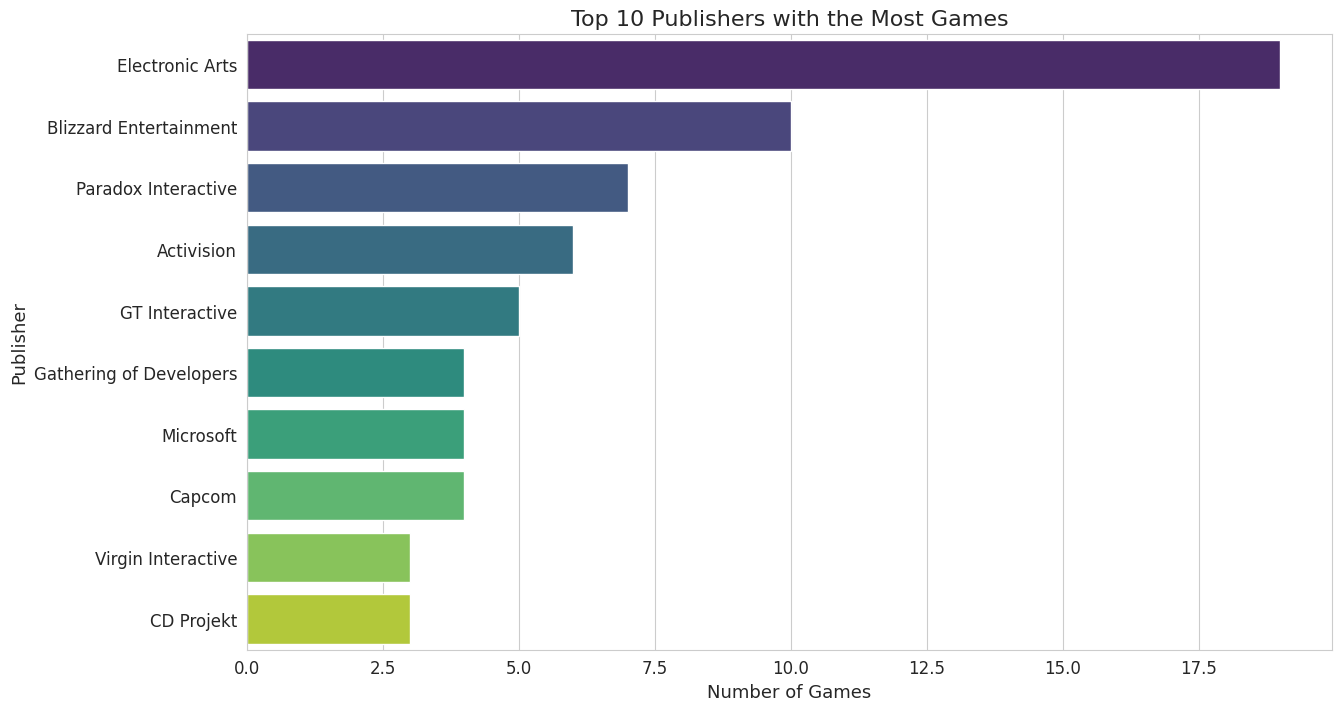

In [ ]:
# Mengatur style
sns.set_style("whitegrid")

# Membuat visualisasi
plt.figure(figsize=(14, 8))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="viridis")

# Menyeting judul dan label
plt.title('Top 10 Publishers with the Most Games', fontsize=16)
plt.xlabel('Number of Games', fontsize=13)
plt.ylabel('Publisher', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan visualisasi
plt.show()

In [ ]:
# Menghitung frekuensi masing-masing developer
developer_counts = df['Developer'].value_counts()

# Menampilkan 10 developer dengan jumlah game terbanyak
top_developers = developer_counts.head(10)
top_developers

Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Capcom                         4
Ensemble Studios               4
CD Projekt Red                 4
Valve                          4
Illusion Softworks             3
Name: Developer, dtype: int64

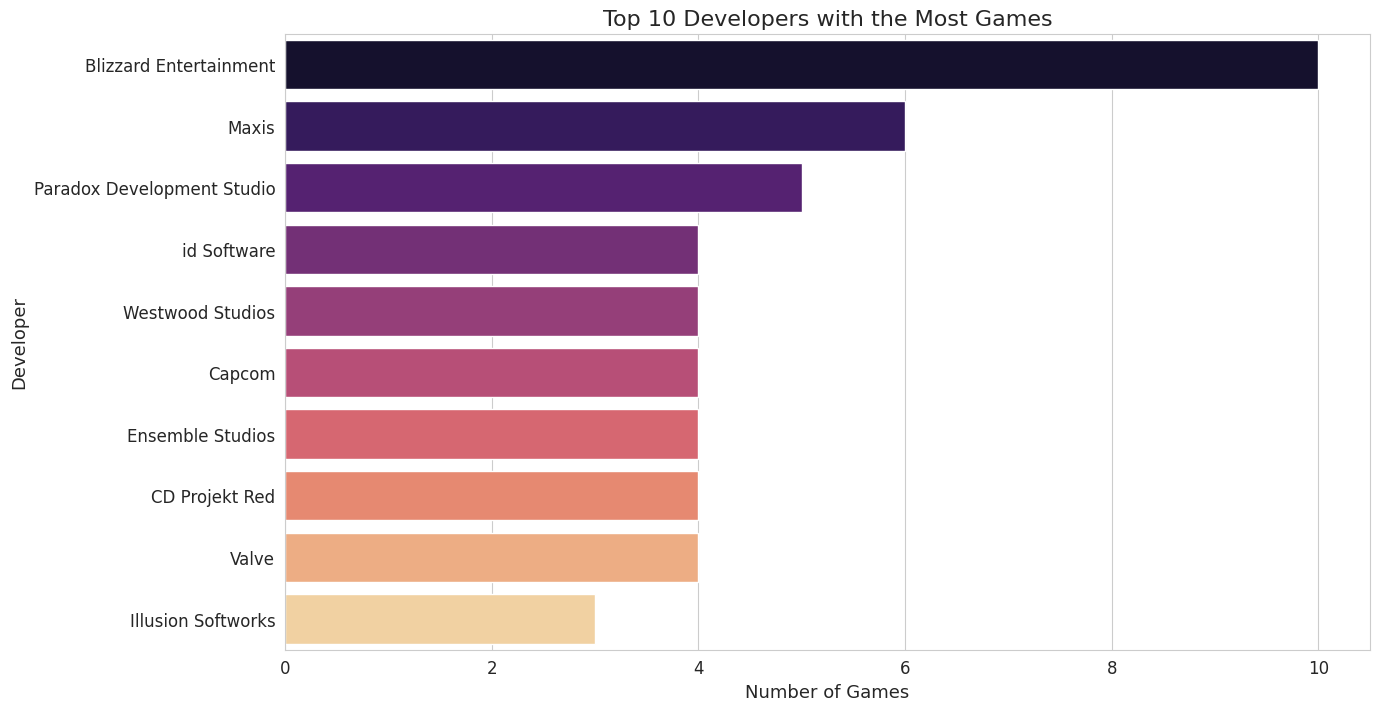

In [ ]:
# Membuat visualisasi untuk 10 developer dengan jumlah game terbanyak
plt.figure(figsize=(14, 8))
sns.barplot(y=top_developers.index, x=top_developers.values, palette="magma")

# Menyeting judul dan label
plt.title('Top 10 Developers with the Most Games', fontsize=16)
plt.xlabel('Number of Games', fontsize=13)
plt.ylabel('Developer', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan visualisasi
plt.show()

In [ ]:
# Mengelompokkan berdasarkan "Series" dan menghitung total "Sales"
series_sales = df[df['Series'] != 'Unknown'].groupby('Series')['Sales'].sum()

# Menampilkan 10 series dengan penjualan terbanyak
top_series_sales = series_sales.sort_values(ascending=False).head(10)
top_series_sales

Series
Minecraft               33.0
Diablo                  26.0
The Sims                24.0
Half-Life               21.0
StarCraft               21.0
Warcraft                19.0
The Witcher             16.0
RollerCoaster Tycoon    14.0
Civilization            14.0
Guild Wars              11.0
Name: Sales, dtype: float64

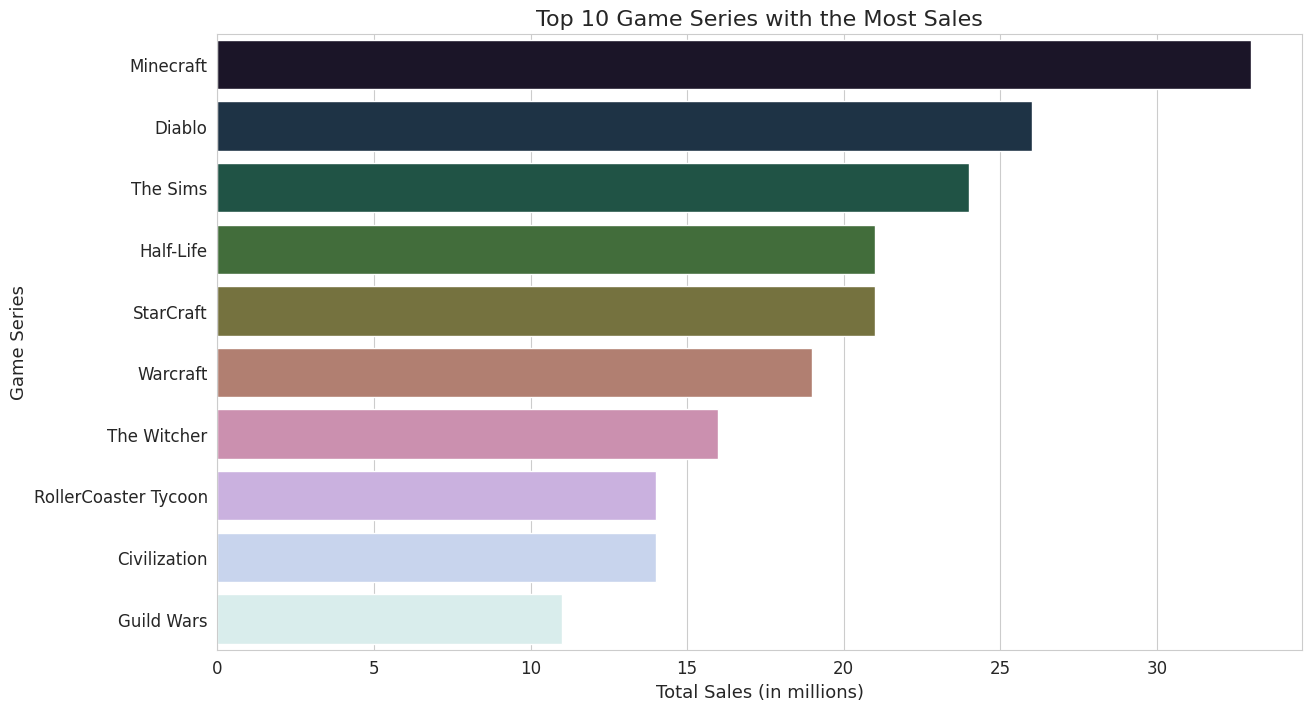

In [ ]:
# Membuat visualisasi untuk 10 series dengan penjualan terbanyak
plt.figure(figsize=(14, 8))
sns.barplot(y=top_series_sales.index, x=top_series_sales.values, palette="cubehelix")

# Menyeting judul dan label
plt.title('Top 10 Game Series with the Most Sales', fontsize=16)
plt.xlabel('Total Sales (in millions)', fontsize=13)
plt.ylabel('Game Series', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan visualisasi
plt.show()

In [ ]:
# Mengelompokkan berdasarkan "Series" dan menghitung jumlah game
series_game_counts = df[df['Series'] != 'Unknown']['Series'].value_counts()

# Menampilkan 10 series dengan jumlah game terbanyak
top_series_game_counts = series_game_counts.head(10)
top_series_game_counts

StarCraft            6
Command & Conquer    5
Civilization         4
Age of Empires       4
Warcraft             3
The Witcher          3
The Sims             3
Diablo               3
Dark Souls           3
Resident Evil        3
Name: Series, dtype: int64

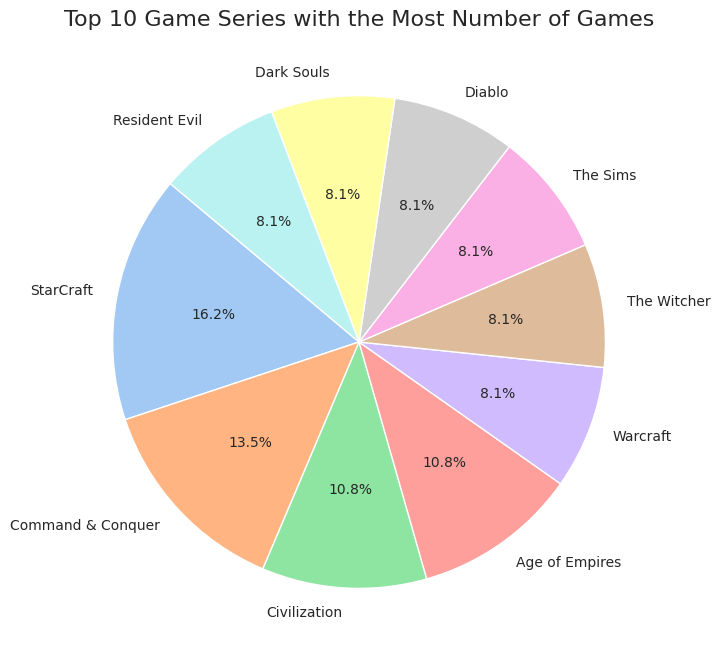

In [ ]:
# Membuat pie chart untuk 10 series dengan jumlah game terbanyak
plt.figure(figsize=(12, 8))
top_series_game_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", 10))
plt.title('Top 10 Game Series with the Most Number of Games', fontsize=16)
plt.ylabel('')  # Menghapus label y agar tampak lebih rapi

# Menampilkan visualisasi
plt.show()

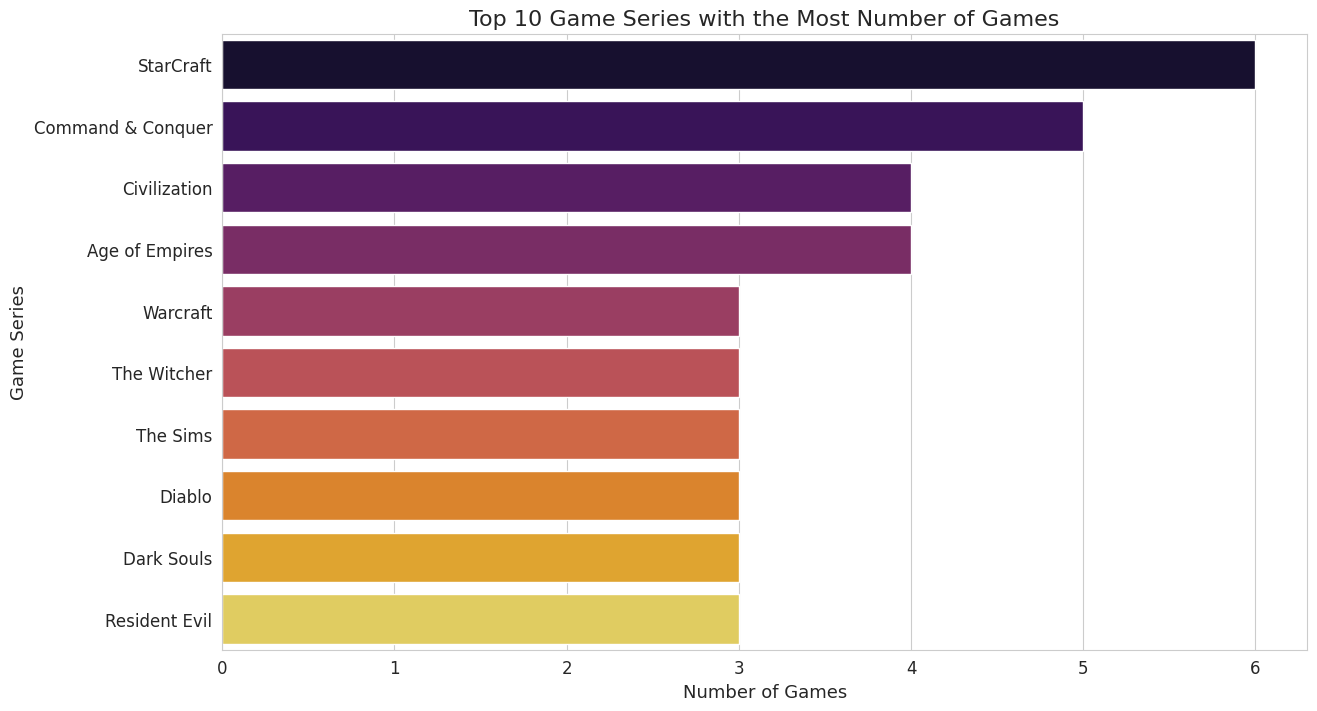

In [ ]:
# Membuat visualisasi untuk 10 series dengan jumlah game terbanyak
plt.figure(figsize=(14, 8))
sns.barplot(y=top_series_game_counts.index, x=top_series_game_counts.values, palette="inferno")

# Menyeting judul dan label
plt.title('Top 10 Game Series with the Most Number of Games', fontsize=16)
plt.xlabel('Number of Games', fontsize=13)
plt.ylabel('Game Series', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan visualisasi
plt.show()